# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

# 1. Load the data set

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

In [31]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [32]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

#  2. EDA

In [33]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: >

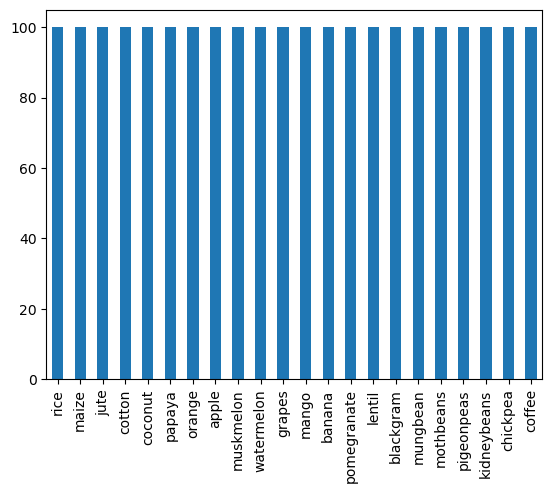

In [34]:
crops.crop.value_counts().plot(kind='bar')

# 3. Split the data

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops[["N", "P", "K", "ph"]],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# 4. Training

In [36]:
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10367653061010057


c:\Users\MORNI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.13310868837820025
F1-score for K: 0.21630633423610235
F1-score for ph: 0.04532731061152114


c:\Users\MORNI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5. Check correlation

In [37]:
# Calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()

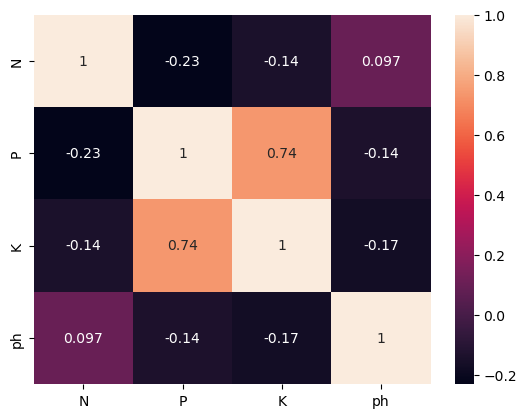

In [38]:
# Create a heatmap using seaborn
sns.heatmap(crops_corr, annot=True)
plt.show()

# Feature Selection

In [39]:
# Select the final features for the model
final_features = ["N", "K", "ph"]

In [40]:
# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# 7. Training

In [41]:
# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")

c:\Users\MORNI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
